In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
weather = pd.read_csv(r'C:\Users\pmven\Google Drive\1. myDocs\Projects\Nice Ride\Data\WeatherDailyMinneapolis2017.csv', sep = ',', encoding = 'utf-8')
weather = weather.rename(columns={'STATION':'Station','NAME':'Name','DATE':'Date','PRCP':'Prcp','TMAX':'Tmax','TMIN':'Tmin'})

In [3]:
weather.head()

,Station,Name,Date,Prcp,Tmax,Tmin
0,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-01,0.00,26,18
1,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-02,0.00,31,20
2,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-03,0.01,30,25
3,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-04,0.00,25,-6
4,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-05,0.01,2,-8


In [4]:
weather.describe()

,Prcp,Tmax,Tmin
count,365.000000,365.000000,365.000000
mean,0.093315,54.263014,37.095890
std,0.279739,22.506821,20.242462
min,0.000000,-8.000000,-17.000000
25%,0.000000,35.000000,24.000000
50%,0.000000,58.000000,39.000000
75%,0.030000,73.000000,55.000000
max,2.050000,93.000000,72.000000


In [5]:
# not sure about Precipitation units. For now, considering to be cm
# Tmax and tmin are in F, Better to generate celcious vals
# No nulls
# No Visual Outliers
# Need to plot 

In [7]:
print('Station', weather['Station'].unique())
print('Name', weather['Name'].unique())

Station ['USC00218450']
Name ['UNIVERSITY OF MN ST. PAUL, MN US']


In [8]:
# Converting the Temperatures
weather['Tmax_c'] = (weather['Tmax'] - 32) * 5 /9
weather['Tmin_c'] = (weather['Tmin'] - 32) * 5 /9

In [9]:
weather.describe()

,Prcp,Tmax,Tmin,Tmax_c,Tmin_c
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.093315,54.263014,37.095890,12.368341,2.831050
std,0.279739,22.506821,20.242462,12.503790,11.245812
min,0.000000,-8.000000,-17.000000,-22.222222,-27.222222
25%,0.000000,35.000000,24.000000,1.666667,-4.444444
50%,0.000000,58.000000,39.000000,14.444444,3.888889
75%,0.030000,73.000000,55.000000,22.777778,12.777778
max,2.050000,93.000000,72.000000,33.888889,22.222222


In [72]:
weather['Prcp_c1'] = weather['Prcp'].rolling(window=30).mean()

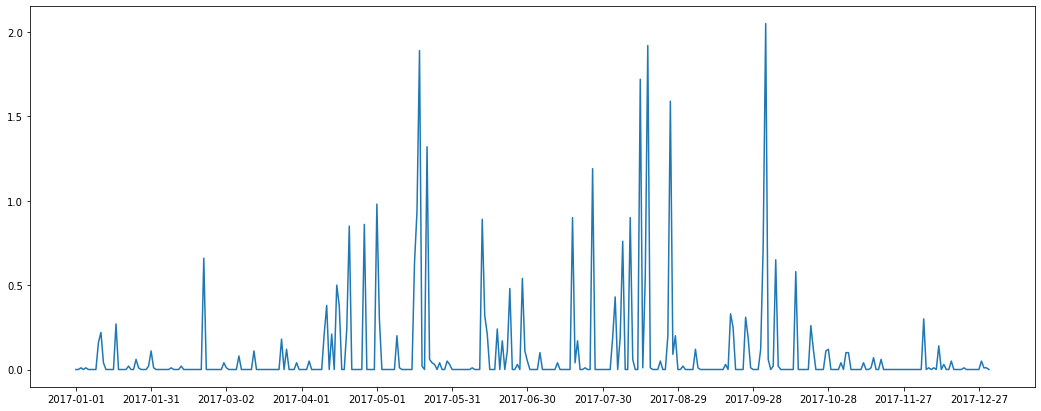

In [76]:
# Plotting Temp and Weathers
plt.plot(weather['Date'], weather['Prcp'])
plt.xticks(np.arange(0,365, 30))
plt.show()

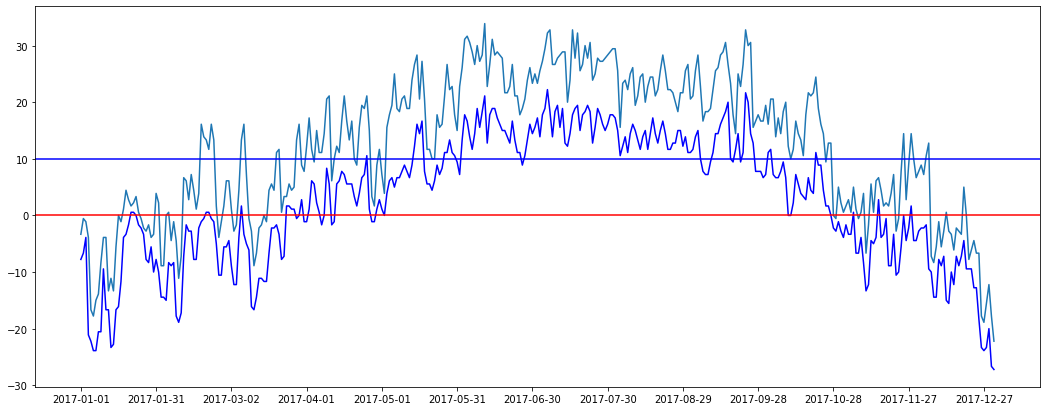

In [29]:
plt.plot(weather['Date'], weather['Tmax_c'])
plt.plot(weather['Date'], weather['Tmin_c'], color = 'b')
plt.xticks(np.arange(0,365, 30))
plt.axhline(0, color='r')
plt.axhline(10, color='b')
plt.show()

In [40]:
# Graph is too hazy, Create a rolling average to get a smoother curve

weather['Tmax_c1'] = weather['Tmax_c'].rolling(window=15).mean()
weather['Tmin_c1'] = weather['Tmin_c'].rolling(window=15).mean()

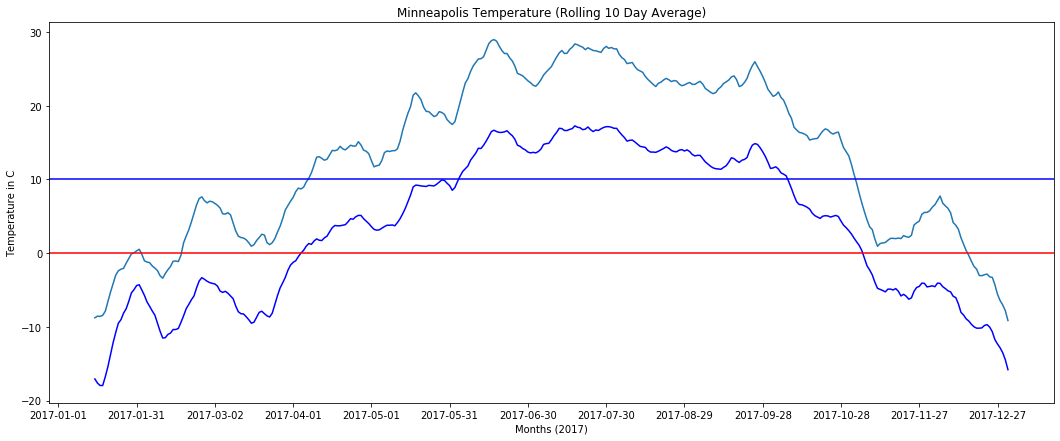

In [44]:
# plotting the same charts again
plt.plot(weather['Date'], weather['Tmax_c1'])
plt.plot(weather['Date'], weather['Tmin_c1'], color = 'b')
plt.xticks(np.arange(0,365, 30))
plt.axhline(0, color='r')
plt.axhline(10, color='b')

plt.xlabel('Months (2017)')
plt.ylabel('Temperature in C')
plt.title('Minneapolis Temperature (Rolling 10 Day Average)')

plt.show()

In [67]:
# Is Precipitation dependent on Temperature?
# Check usind sklearn

from sklearn import linear_model
from sklearn import metrics

In [74]:
# model = linear_model.LinearRegression()
# model.fit(weather[['Tmax_c']], weather['Prcp'])
# model.classification_report